kmeans


C:\Users\saura\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\saura\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans Cluster Centers
[[ 1.11022302e-16  3.84615385e-02  3.84615385e-02  3.84615385e-02
   9.61538462e-01  8.84615385e-01  5.38461538e-01  4.23076923e-01
   8.46153846e-01  3.46153846e-01  5.00000000e-01  5.38461538e-01
   4.23076923e-01  1.53846154e-01]
 [ 7.06896552e-01  5.34482759e-01  5.51724138e-01  4.31034483e-01
   6.20689655e-01  3.62068966e-01  8.62068966e-02  5.17241379e-02
   1.72413793e-01 -1.11022302e-16  3.44827586e-02  5.17241379e-02
   1.72413793e-02 -1.38777878e-16]
 [-1.66533454e-16 -3.05311332e-16 -2.77555756e-16 -1.66533454e-16
   2.00000000e-01  3.77777778e-01  2.22222222e-02  1.33333333e-01
   2.22222222e-01  2.44444444e-01  4.22222222e-01  3.11111111e-01
   4.44444444e-01  4.00000000e-01]]
Total No. of Data 129
70% of Training Data 90
30% of Testing Data 39
Predicted Output [2 1 0 1 1 2 2 0 0 1 2 1 2 1 2 1 1 2 0 2 1 1 0 1 0 1 2 2 1 1 1 1 0 1 2 1 2
 1 2]
Actual Output [2 1 0 1 1 2 2 0 0 1 2 1 2 1 2 1 1 2 0 2 1 1 0 1 0 1 2 2 1 1 1 1 0 1 2 1 2
 1 2]
Confusion matri

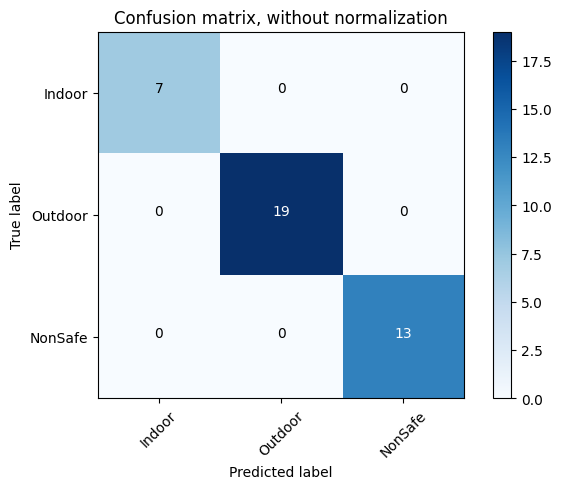

SVM Classifier Performance Metrics
              precision    recall  f1-score   support

     class 1       1.00      1.00      1.00         7
     class 2       1.00      1.00      1.00        19
     class 3       1.00      1.00      1.00        13

    accuracy                           1.00        39
   macro avg       1.00      1.00      1.00        39
weighted avg       1.00      1.00      1.00        39

accuracy: 1.0


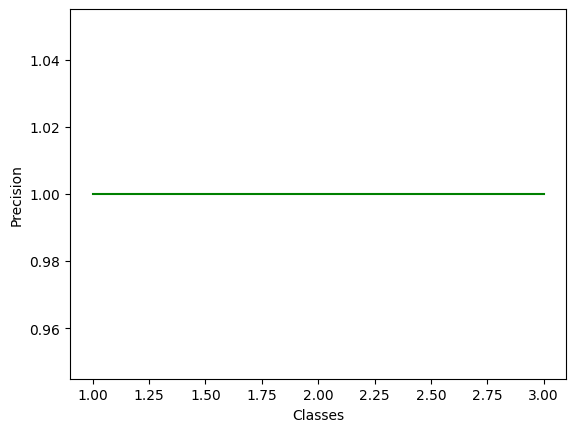

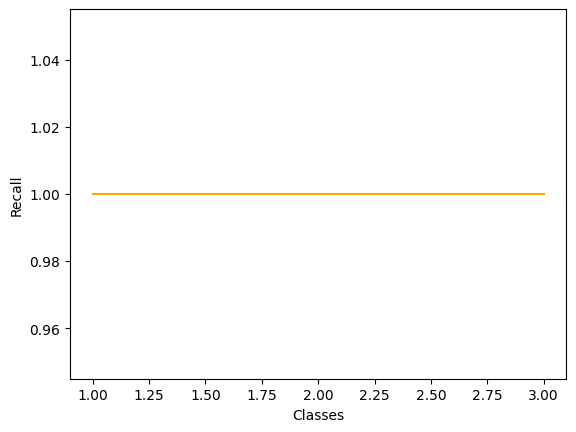

C:\Users\saura\anaconda3\Lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function plot_precision_recall_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_precision_recall instead.
  warnings.warn(msg, category=FutureWarning)


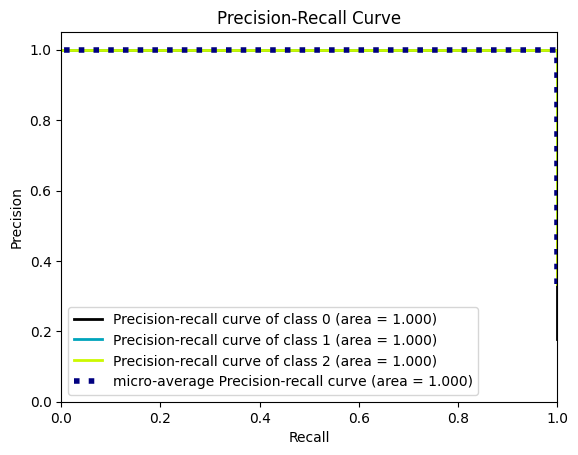

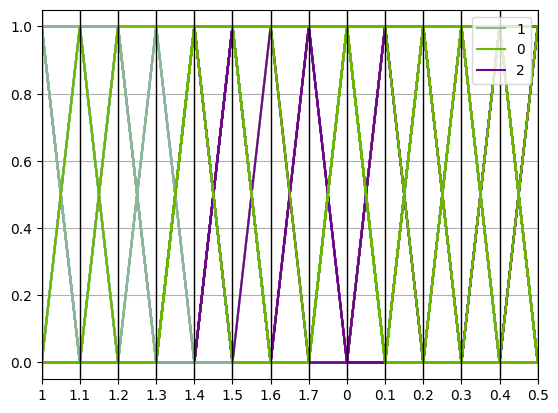

In [2]:
from __future__ import division, print_function
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import itertools
import csv
import scikitplot as skplt
from sklearn import preprocessing
from sklearn.cluster import KMeans
from pylab import scatter,show,plot
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import skfuzzy
from pandas.plotting import parallel_coordinates
from sklearn.metrics import classification_report
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score
from itertools import cycle
from sklearn.metrics import precision_score,recall_score,accuracy_score
from sklearn.datasets import make_blobs
from sklearn.svm import SVC


# load dataset
#data = pd.read_csv('/home/kavin/mylife/2018/knn/bigclusters/cat_knn.csv')
#data_labels = pd.read_csv('/home/kavin/mylife/2018/knn/bigclusters/cat_knn_lab.csv')
sam = pd.read_csv('rbm_data.csv')
data = sam
'''
y = skfuzzy.membership.gbellmf(data, 10.0, 5.0, 3.0)#a-width,b-center,c-slope
print ('Bell Membership Function')
print(y)
'''
#data = sam1
#print(data)
print('kmeans')
kmeans = KMeans(n_clusters=3).fit(data)
class_labels = kmeans.labels_
print('KMeans Cluster Centers')
print(kmeans.cluster_centers_)
#print(metrics.adjusted_rand_score(true_labels, class_labels)) 
#print('kmedians')
#kmedians = KMedians(k=15)
#kmedians.fit(data)
#class_labels2 = kmeans.labels_
#print(class_labels2)

#print('fuzzy kmeans')
#fuzzy_kmeans = FuzzyKMeans(k=4, m=2)
#fuzzy_kmeans.fit(data)
#class_labels = fuzzy_kmeans.labels_
#print('fuzzy kmeans centroids')
#print(fuzzy_kmeans.cluster_centers_)

#print(len(data))
#print(len(class_labels))

data2 = data
idx = 14
data2.insert(loc=idx, column = 'Class', value = class_labels) # to insert new column in dataframe


#neigh = KNeighborsClassifier(n_neighbors=3)
clf = SVC(probability=True, kernel = 'poly',degree=3) # kernel = sigmoid(low accuracy), poly(50 = 98%,30 = 100%)
X_train, X_test, y_train, y_test = train_test_split(data, class_labels, test_size=0.30, random_state=42)
#neigh.fit(X_train, np.ravel(y_train))
clf.fit(X_train, np.ravel(y_train))

y_pred = clf.predict(X_test)
y_prob = clf.predict_proba(X_test)

print('Total No. of Data',len(data))
print('70% of Training Data',len(X_train))
print('30% of Testing Data',len(X_test))

print('Predicted Output', clf.predict(X_test))

print('Actual Output' , y_test)

def plot_confusion_matrix(cm, classes,normalize=False,title='Confusion matrix',cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    #print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Compute confusion matrix
cnf_matrix = confusion_matrix(y_pred,y_test)
np.set_printoptions(precision=2)

class_names = ['Indoor','Outdoor','NonSafe']
# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix, without normalization')

#Plot normalized confusion matrix
#plt.figure()
#plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
#                      title='Normalized confusion matrix')

plt.show()

target_names = ['class 1', 'class 2','class 3']
graph_cl = [1,2,3]
print('SVM Classifier Performance Metrics')
print(classification_report(y_test, y_pred, target_names=target_names))
precision = precision_score(y_test, y_pred, average=None)
#print(precision)
recall = recall_score(y_test, y_pred, average=None)
#rint(recall)
accuracy = accuracy_score(y_test, y_pred)
print('accuracy:',accuracy)

#plt.scatter(graph_cl,precision,c=graph_cl)
plt.plot(graph_cl,precision,color='g')
plt.xlabel('Classes')
plt.ylabel('Precision')
plt.show()

#plt.scatter(graph_cl,recall,c=graph_cl)
plt.plot(graph_cl,recall,c='orange')
plt.xlabel('Classes')
plt.ylabel('Recall')
plt.show()

skplt.metrics.plot_precision_recall_curve(y_test, y_prob)
plt.show()


#X_norm = (X_train - X_train.min())/(X_train.max() - X_train.min())
#data_norm = pd.concat([X_norm, y_train], axis=1)

parallel_coordinates(data2, 'Class')
plt.show()
